<a href="https://colab.research.google.com/github/Aryank47/machine_learning/blob/master/Facebook_Marketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
# Load the dataset
file_path = 'Facebook_Marketplace_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [ ]:
# Remove redundant columns
data_cleaned = data.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])

# Convert status_published to datetime
data_cleaned['status_published'] = pd.to_datetime(data_cleaned['status_published'])

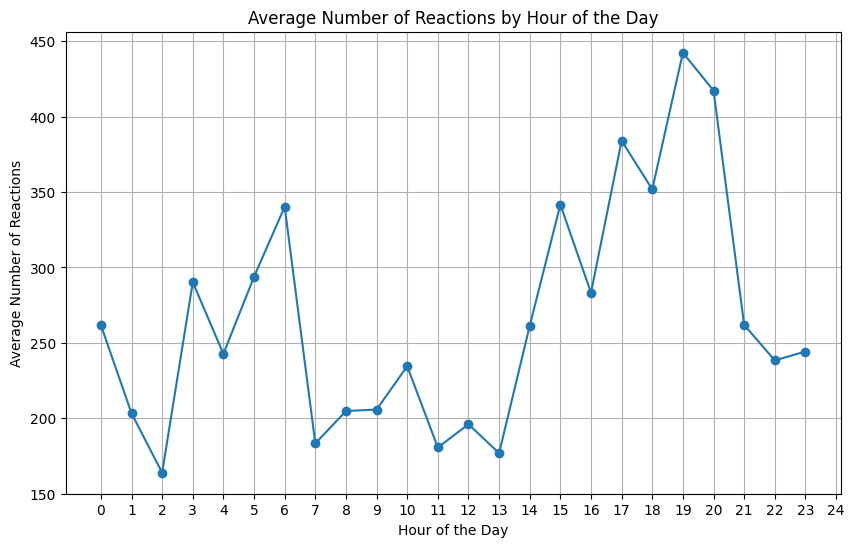

In [ ]:
# 1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

# Extract hour from status_published
data_cleaned['hour_published'] = data_cleaned['status_published'].dt.hour

# Group by hour and calculate average reactions
hourly_reactions = data_cleaned.groupby('hour_published')['num_reactions'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hourly_reactions['hour_published'], hourly_reactions['num_reactions'], marker='o')
plt.title('Average Number of Reactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Reactions')
plt.grid(True)
plt.xticks(ticks=range(0, 25, 1))
plt.show()


In [ ]:
"""
2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments
 and shares (num_shares)? If so, what is the strength and direction of this correlation?
"""
# Calculate correlation
correlation_matrix = data_cleaned[['num_reactions', 'num_comments', 'num_shares']].corr()

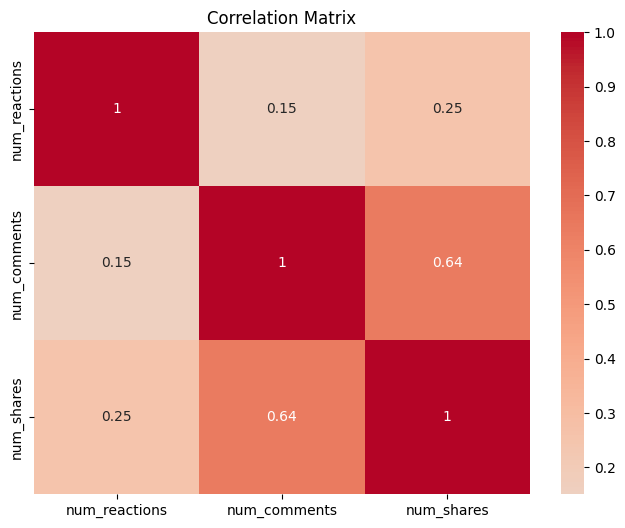

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

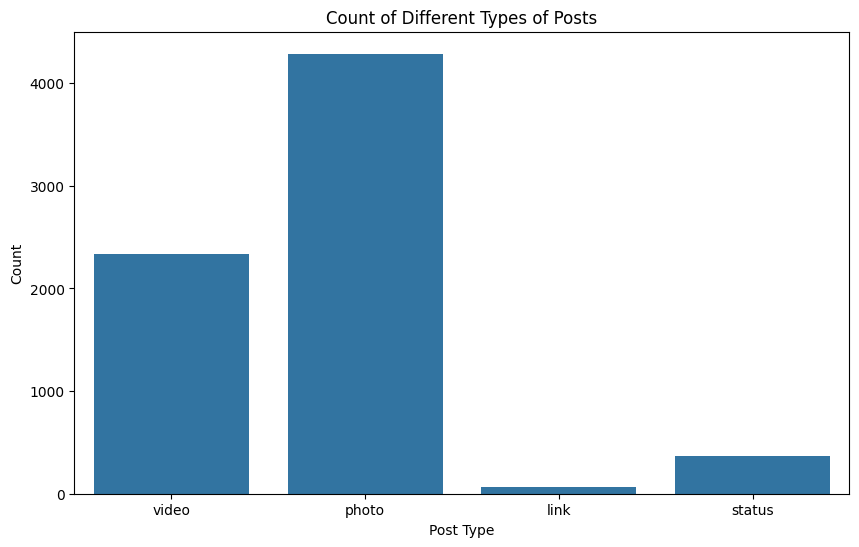

In [ ]:
# 5.	What is the count of different types of posts in the dataset?

plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='status_type')
plt.title('Count of Different Types of Posts')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.show()

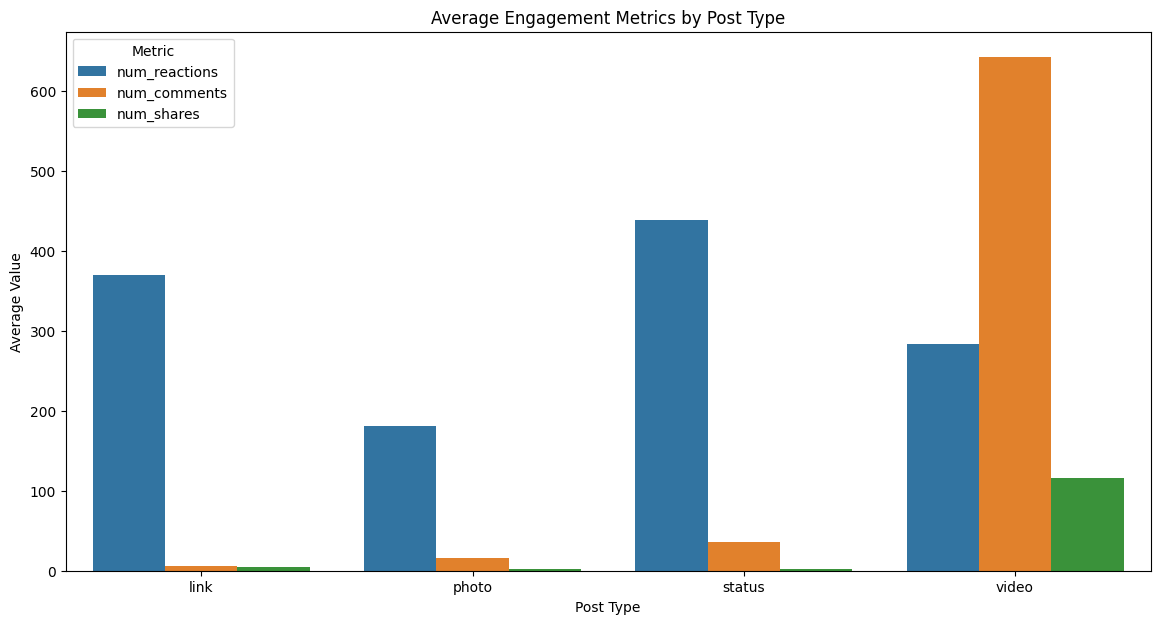

In [ ]:
# 6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

# Average values for each post type
average_metrics_by_post_type = data_cleaned.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean().reset_index()

# Plotting average metrics
plt.figure(figsize=(14, 7))
sns.barplot(data=average_metrics_by_post_type.melt(id_vars='status_type'), x='status_type', y='value', hue='variable')
plt.title('Average Engagement Metrics by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.show()

In [ ]:
"""
3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys
 to train a K-Means clustering model on the Facebook Live Sellers dataset.
"""

from sklearn.model_selection import train_test_split

# Select columns for clustering
columns_for_clustering = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Split the data into train (70%), validation (10%), and test (20%) sets
train_data, temp_data = train_test_split(data_cleaned, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.67, random_state=42)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform train, validation, and test sets
train_scaled = scaler.fit_transform(train_data[columns_for_clustering])
validation_scaled = scaler.transform(validation_data[columns_for_clustering])
test_scaled = scaler.transform(test_data[columns_for_clustering])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(train_scaled)

validation_clusters=kmeans.predict(validation_scaled)
test_cluster = kmeans.predict(test_scaled)

# Predict clusters for validation and test sets
train_data['cluster'] = kmeans.labels_
validation_data['cluster'] = validation_clusters
test_data['cluster'] = test_cluster

In [ ]:
# Silhouette Score for validation and test sets
silhouette_score_validation = silhouette_score(validation_scaled, validation_data['cluster'])
silhouette_score_test = silhouette_score(test_scaled, test_data['cluster'])

print("Inertia:")
print(kmeans.inertia_)

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(validation_scaled, validation_clusters)
print("\nSilhouette Score on Validation Set: ", silhouette_avg)
print(f'Silhouette Score (Validation): {silhouette_score_validation}')
print(f'Silhouette Score (Test): {silhouette_score_test}')

Inertia:
20016.275662961918

Silhouette Score on Validation Set:  0.6820613923314731
Silhouette Score (Validation): 0.6820613923314731
Silhouette Score (Test): 0.7030730504331445


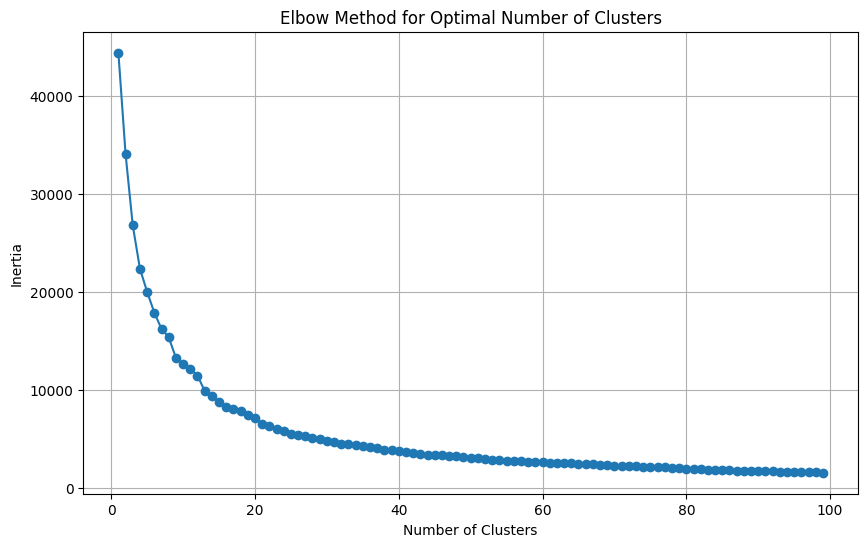

In [ ]:
# 4.	Use the elbow method to find the optimum number of clusters.

inertia = []
for n in range(1, 100):
    kmeans = KMeans(n_clusters=n, random_state=42,n_init='auto')
    kmeans.fit(train_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()